In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
auto_df = pd.read_csv('datasets/Auto.csv', na_values='?').dropna()
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Датасет седержит информацию о потреблении топлива различными автомобилями.
Атрибуты, которые мы будем рассматривать:
* mpg - пробег (в милях) на галон бензина
* horsepower - количество лошадиных сил

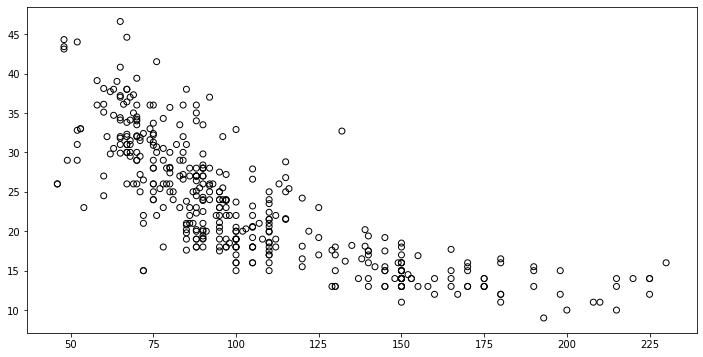

In [3]:
plt.figure(figsize=(12, 6))
plt.scatter(auto_df.horsepower, auto_df.mpg, facecolors='None', edgecolors='k')

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

auto_df.sort_values('horsepower', inplace=True)

# Линейная регрессия
X = auto_df.horsepower.values.reshape(-1, 1)
y = auto_df.mpg.values.reshape(-1, 1)

lm = LinearRegression().fit(X, y)
y_pred = lm.predict(X)

# полином второй степени
X2 = PolynomialFeatures(degree=2).fit_transform(X)
lm2 = LinearRegression().fit(X2, y)
y2_pred = lm2.predict(X2)

# Полином 5 степени
X5 = PolynomialFeatures(degree=5).fit_transform(X)
lm5 = LinearRegression().fit(X5, y)
y5_pred = lm5.predict(X5)

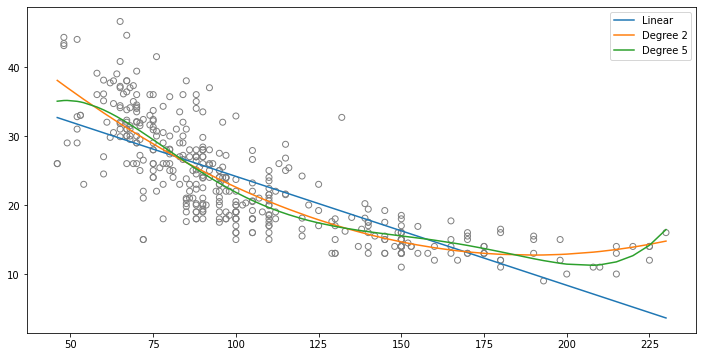

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(auto_df.horsepower, auto_df.mpg, facecolors='None', edgecolors='grey')
plt.plot(X, y_pred, label='Linear')
plt.plot(X, y2_pred, label='Degree 2')
plt.plot(X, y5_pred, label='Degree 5')
plt.legend(loc='best')

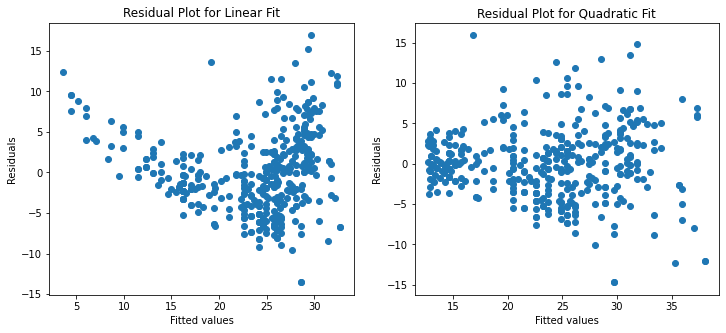

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left plot
ax1.scatter(y_pred, y - y_pred)
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
ax2.scatter(y2_pred, y - y2_pred)
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

## Коллинеарность

In [7]:
credit_df = pd.read_csv('datasets/Credit.csv')
credit_df.drop('Unnamed: 0', axis=1, inplace=True)
credit_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Датасет содержит информацию о кредитном балдансе различных людей.

Атрибуты, которые мы будем рассматривать:

* Age - возраст
* Limit - кредитный лимит
* Rating - кредитный рейтинг
* Balance - баланс

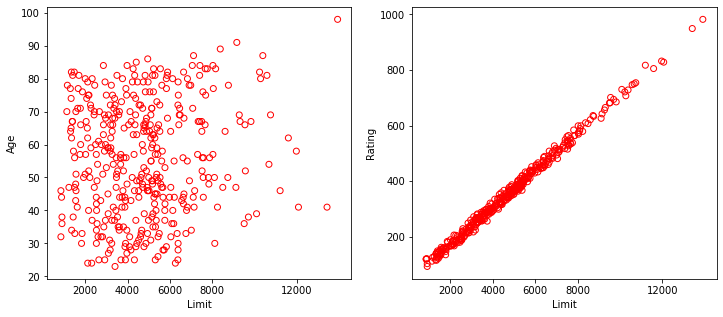

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Left plot
ax1.scatter(credit_df.Limit, credit_df.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit_df.Limit, credit_df.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000, 4000, 6000, 8000, 12000])

In [9]:
# est = smf.ols(formula='Balance ~ Age + Limit', data=credit_df).fit()
est = smf.ols(formula='Balance ~ Age + Limit + Rating * Limit', data=credit_df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     311.7
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          9.59e-121
Time:                        09:03:48   Log-Likelihood:                -2734.4
No. Observations:                 400   AIC:                             5479.
Df Residuals:                     395   BIC:                             5499.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -406.9585     73.057     -5.570      0.000    -550.588    -263.329
Age             -2.1661      0.664     -3.262      0.001      -3.472      -0.861
Limit            0.0320      0.062      0.513      0.609      -0.091       0.155
Rating           2.9003      0.949      3.056      0.002       1.035       4.766
Rating:Limit -6.553e-05   2.12e-05     -3.088      0.002      -0.000   -2.38e-05
==============================================================================
Omnibus:                       14.734   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               25.783
Skew:                           0.218   Prob(JB):                     2.52e-06
Kurtosis:                       4.165   Cond. No.                     1.81e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* первый пример говорит, что Limit значим для предсказания Balance
* второй пример говорит, что Limit не значим для предсказания Balance (значимость Limit замаскирована

колинеарностью)

In [34]:
adv_df = pd.read_csv('datasets/Advertising.csv')
adv_df.drop('Unnamed: 0', axis=1, inplace=True)
adv_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
from sklearn.linear_model import Ridge, Lasso

In [36]:
X = adv_df[['TV', 'radio', 'newspaper']].values
y = adv_df.sales

In [38]:
lm = LinearRegression().fit(X, y)
print(lm.intercept_)
print(lm.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [39]:
rg = Ridge().fit(X, y)
print(rg.intercept_)
print(rg.coef_)

2.9389674583301435
[ 0.04576464  0.1885251  -0.00103629]


In [40]:
rg = Lasso().fit(X, y)
print(rg.intercept_)
print(rg.coef_)

3.040215583480377
[0.04566142 0.1834644  0.        ]


In [43]:
X.shape[1]

3

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X.shape[1]).fit(X)
for i in range(1, X.shape[1] + 1):
    print(f'n_components= {i}, explaned_variance {sum(pca.explained_variance_ratio_[:i]):.3f}')

n_components= 1, explaned_variance 0.914
n_components= 2, explaned_variance 0.978
n_components= 3, explaned_variance 1.000


In [47]:
new_adv_df = pd.DataFrame(PCA(n_components=1).fit_transform(X), columns=['f1'])
new_adv_df['sales'] = adv_df.sales
new_adv_df.head()

,f1,sales
0,83.788546,22.1
1,-102.138730,10.4
2,-128.992484,9.3
3,5.070972,18.5
4,34.059003,12.9


In [53]:
pca_lm = smf.ols('sales ~ f1', new_adv_df).fit()
rss = np.sum(pca_lm.resid ** 2)
print('RSS:', rss)
print('R^2:', pca_lm.rsquared)

RSS: 2088.6304922990535
R^2: 0.6144409930964045


## Теория

В случае с двухмерными линейно разделимыми данными, SVM создает границы принятия решения так, чтобы

экземпляры двух классов были максимально удалены от этой границы.

In [54]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

In [55]:
iris = load_iris()
X = iris['data'][:, (2, 3)] # petal length, petal width
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)


SVC(C=inf, kernel='linear')

In [ ]:
def plot_svc_decision_boundary(svm_clf, x_min, x_max):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At the decision boundary, w0 * x0 + w1 * x1 + b = 0
    # => x1= -w0/w1 * x0 - b/w1